In [5]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def bubble_sort_trace(arr):
    states = [arr.copy()]
    arr = arr.copy()
    n = len(arr)
    for i in range(n):
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
            states.append(arr.copy())
    return states

def insertion_sort_trace(arr):
    states = [arr.copy()]
    arr = arr.copy()
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
            states.append(arr.copy())
        arr[j + 1] = key
        states.append(arr.copy())
    return states

def quick_sort_trace(arr):
    states = [arr.copy()]
    arr = arr.copy()

    def quick_sort_recursive(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            states.append(arr.copy())
            quick_sort_recursive(arr, low, pi - 1)
            quick_sort_recursive(arr, pi + 1, high)

    def partition(arr, low, high):
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            if arr[j] < pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
                states.append(arr.copy())
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        states.append(arr.copy())
        return i + 1

    quick_sort_recursive(arr, 0, len(arr) - 1)
    return states

def merge_sort_trace(arr):
    states = [arr.copy()]
    arr = arr.copy()

    def merge_sort_recursive(arr):
        if len(arr) > 1:
            mid = len(arr) // 2
            left = arr[:mid]
            right = arr[mid:]
            merge_sort_recursive(left)
            merge_sort_recursive(right)

            i = j = k = 0
            while i < len(left) and j < len(right):
                if left[i] < right[j]:
                    arr[k] = left[i]
                    i += 1
                else:
                    arr[k] = right[j]
                    j += 1
                k += 1
                states.append(arr.copy())

            while i < len(left):
                arr[k] = left[i]
                i += 1
                k += 1
                states.append(arr.copy())

            while j < len(right):
                arr[k] = right[j]
                j += 1
                k += 1
                states.append(arr.copy())

    merge_sort_recursive(arr)
    return states

def selection_sort_trace(arr):
    states = [arr.copy()]
    arr = arr.copy()
    for i in range(len(arr)):
        min_idx = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
        states.append(arr.copy())
    return states

def heap_sort_trace(arr):
    states = [arr.copy()]
    arr = arr.copy()

    def heapify(arr, n, i):
        largest = i
        left = 2 * i + 1
        right = 2 * i + 2

        if left < n and arr[left] > arr[largest]:
            largest = left
        if right < n and arr[right] > arr[largest]:
            largest = right
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            states.append(arr.copy())
            heapify(arr, n, largest)

    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        states.append(arr.copy())
        heapify(arr, i, 0)

    return states

def shell_sort_trace(arr):
    states = [arr.copy()]
    arr = arr.copy()
    n = len(arr)
    gap = n // 2
    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
                states.append(arr.copy())
            arr[j] = temp
            states.append(arr.copy())
        gap = gap // 2
    return states

def cocktail_shaker_sort_trace(arr):
    states = [arr.copy()]
    arr = arr.copy()
    n = len(arr)
    swapped = True
    start = 0
    end = n - 1
    while swapped:
        swapped = False
        # Passa da esquerda para a direita
        for i in range(start, end):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
                states.append(arr.copy())
        if not swapped:
            break
        end -= 1
        # Passa da direita para a esquerda
        swapped = False
        for i in range(end - 1, start - 1, -1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
                states.append(arr.copy())
        start += 1
    return states

def radix_sort_trace(arr):
    states = [arr.copy()]
    arr = arr.copy()
    max_num = max(arr)
    exp = 1
    while max_num // exp > 0:
        buckets = [[] for _ in range(10)]
        for num in arr:
            digit = (num // exp) % 10
            buckets[digit].append(num)
        arr = [num for bucket in buckets for num in bucket]
        states.append(arr.copy())
        exp *= 10
    return states

# Geração de dados
num_samples = 100
vector_size = 6

data = []
algorithms = {
    "Bubble Sort": bubble_sort_trace,
    "Insertion Sort": insertion_sort_trace,
    "Quick Sort": quick_sort_trace,
    "Merge Sort": merge_sort_trace,
    "Selection Sort": selection_sort_trace,
    "Heap Sort": heap_sort_trace,
    "Shell Sort": shell_sort_trace,
    "Cocktail Shaker Sort": cocktail_shaker_sort_trace,
    "Radix Sort": radix_sort_trace
}

for _ in range(num_samples):
    original_vector = random.sample(range(1, 100), vector_size)
    for algo_name, algo_func in algorithms.items():
        states = algo_func(original_vector)
        data.append({"states": states, "algorithm": algo_name})

# Criar DataFrame
df = pd.DataFrame(data)

# Exibir estatísticas
df["sequence_length"] = df["states"].apply(len)
print(df.head())
print(df["sequence_length"].describe())


                                              states       algorithm  \
0  [[84, 20, 25, 32, 21, 46], [20, 84, 25, 32, 21...     Bubble Sort   
1  [[84, 20, 25, 32, 21, 46], [84, 84, 25, 32, 21...  Insertion Sort   
2  [[84, 20, 25, 32, 21, 46], [20, 84, 25, 32, 21...      Quick Sort   
3  [[84, 20, 25, 32, 21, 46], [20, 25], [20, 25],...      Merge Sort   
4  [[84, 20, 25, 32, 21, 46], [20, 84, 25, 32, 21...  Selection Sort   

   sequence_length  
0               16  
1               13  
2               12  
3               17  
4                7  
count    900.000000
mean      11.790000
std        4.681076
min        3.000000
25%        7.000000
50%       13.000000
75%       16.000000
max       20.000000
Name: sequence_length, dtype: float64


In [6]:
df

,states,algorithm,sequence_length
0,"[[84, 20, 25, 32, 21, 46], [20, 84, 25, 32, 21...",Bubble Sort,16
1,"[[84, 20, 25, 32, 21, 46], [84, 84, 25, 32, 21...",Insertion Sort,13
2,"[[84, 20, 25, 32, 21, 46], [20, 84, 25, 32, 21...",Quick Sort,12
3,"[[84, 20, 25, 32, 21, 46], [20, 25], [20, 25],...",Merge Sort,17
4,"[[84, 20, 25, 32, 21, 46], [20, 84, 25, 32, 21...",Selection Sort,7
...,...,...,...
895,"[[49, 94, 10, 89, 64, 47], [10, 94, 49, 89, 64...",Selection Sort,7
896,"[[49, 94, 10, 89, 64, 47], [49, 94, 47, 89, 64...",Heap Sort,14
897,"[[49, 94, 10, 89, 64, 47], [49, 94, 10, 89, 64...",Shell Sort,16
898,"[[49, 94, 10, 89, 64, 47], [49, 10, 94, 89, 64...",Cocktail Shaker Sort,10


In [7]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Extrair os rótulos (nomes dos algoritmos)
labels = df["algorithm"]

# Transformar os rótulos em números (Label Encoding)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Converter todas as sequências para arrays NumPy, garantindo que cada estado dentro das sequências tenha o mesmo tamanho
sequences = []
max_state_length = max(max(len(state) for state in seq) for seq in df["states"])  # Maior comprimento de um estado

for seq in df["states"]:
    # Padronizar cada estado individualmente
    padded_seq = [np.pad(state, (0, max_state_length - len(state)), constant_values=-1) for state in seq]
    sequences.append(padded_seq)

# Encontrar o comprimento máximo das sequências
max_sequence_length = max(len(seq) for seq in sequences)

# Padronizar as sequências para que todas tenham o mesmo comprimento
X_padded = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', dtype='float32', value=-1.0)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)



In [8]:

# ---------- CRIAÇÃO DO MODELO ----------
model = Sequential([
    Masking(mask_value=-1, input_shape=(max_sequence_length, vector_size)),  # Ignora os valores de padding (-1)
    LSTM(128, return_sequences=True),  # Camada LSTM
    LSTM(64),  # Outra camada LSTM
    Dense(32, activation='relu'),
    Dense(len(algorithms), activation='softmax')  # Saída com softmax para classificação
])

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ---------- TREINAMENTO ----------
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# ---------- AVALIAÇÃO ----------
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia do modelo: {accuracy:.2%}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.2335 - loss: 2.0440 - val_accuracy: 0.5444 - val_loss: 1.4114
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5630 - loss: 1.3272 - val_accuracy: 0.6667 - val_loss: 1.0173
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7271 - loss: 0.8309 - val_accuracy: 0.7889 - val_loss: 0.6236
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8062 - loss: 0.6078 - val_accuracy: 0.7944 - val_loss: 0.5465
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8471 - loss: 0.4419 - val_accuracy: 0.8000 - val_loss: 0.5004
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8477 - loss: 0.3690 - val_accuracy: 0.8056 - val_loss: 0.4181
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8819 - loss: 0.3419 - val_accuracy: 0.8278 - val_loss: 0.3912
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8994 - loss: 0.2661 - val_accuracy: 0.8222 - v

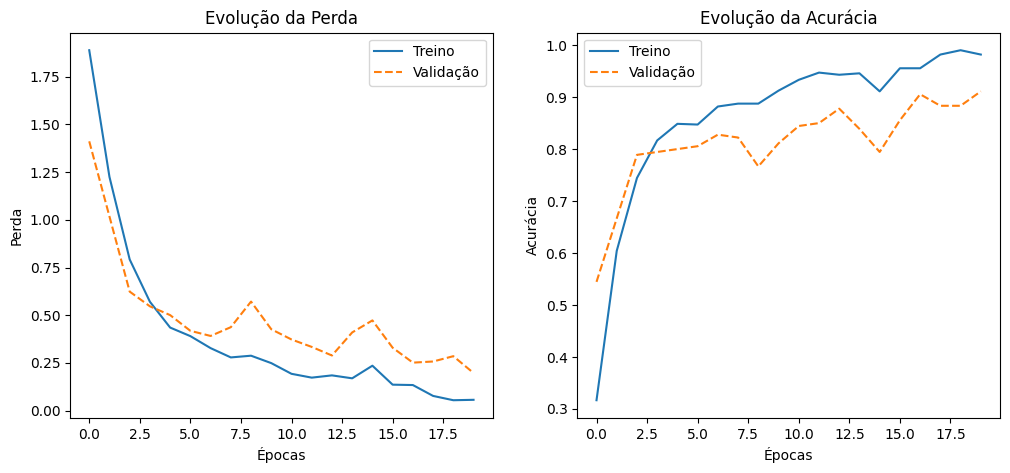

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


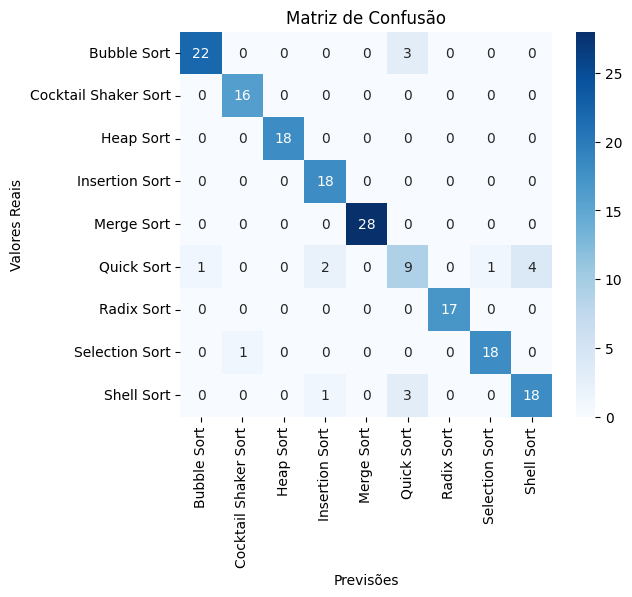

Relatório de Classificação:
                       precision    recall  f1-score   support

         Bubble Sort       0.96      0.88      0.92        25
Cocktail Shaker Sort       0.94      1.00      0.97        16
           Heap Sort       1.00      1.00      1.00        18
      Insertion Sort       0.86      1.00      0.92        18
          Merge Sort       1.00      1.00      1.00        28
          Quick Sort       0.60      0.53      0.56        17
          Radix Sort       1.00      1.00      1.00        17
      Selection Sort       0.95      0.95      0.95        19
          Shell Sort       0.82      0.82      0.82        22

            accuracy                           0.91       180
           macro avg       0.90      0.91      0.90       180
        weighted avg       0.91      0.91      0.91       180



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Criar figura para os gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico da perda
ax[0].plot(history.history['loss'], label='Treino')
ax[0].plot(history.history['val_loss'], label='Validação', linestyle='dashed')
ax[0].set_title('Evolução da Perda')
ax[0].set_xlabel('Épocas')
ax[0].set_ylabel('Perda')
ax[0].legend()

# Gráfico da acurácia
ax[1].plot(history.history['accuracy'], label='Treino')
ax[1].plot(history.history['val_accuracy'], label='Validação', linestyle='dashed')
ax[1].set_title('Evolução da Acurácia')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('Acurácia')
ax[1].legend()

plt.show()

# ---------- GRÁFICO 2: Matriz de confusão ----------
# Fazer previsões
y_pred = model.predict(X_test).argmax(axis=1)

# Criar matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

# ---------- RELATÓRIO DE CLASSIFICAÇÃO ----------
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


In [11]:
import random
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ---------- GERAÇÃO DO NOVO DATASET DE TESTE ----------
num_samples_test = 50  # Número de exemplos para teste real
vector_size = 6  # Tamanho dos vetores (igual ao do treinamento)

new_data = []
for _ in range(num_samples_test):
    original_vector = random.sample(range(1, 100), vector_size)  # Gera um vetor aleatório único
    for algo_name, algo_func in algorithms.items():
        states = algo_func(original_vector)  # Obtém a sequência completa de estados
        new_data.append({"states": states, "algorithm": algo_name})

# Criar novo DataFrame
df_new_test = pd.DataFrame(new_data)

# ---------- PRÉ-PROCESSAMENTO DO NOVO DATASET ----------
# Padronizar os estados internos para o mesmo comprimento
max_state_length = max(max(len(state) for state in seq) for seq in df_new_test["states"])

new_sequences = []
for seq in df_new_test["states"]:
    padded_seq = [np.pad(state, (0, max_state_length - len(state)), constant_values=-1) for state in seq]
    new_sequences.append(padded_seq)

# Padronizar as sequências para o mesmo comprimento do modelo
X_new_padded = pad_sequences(new_sequences, maxlen= max_sequence_length, padding='post', dtype='float32', value=-1.0)

# Codificar os rótulos
y_new = label_encoder.transform(df_new_test["algorithm"])

# ---------- TESTE DO MODELO COM O NOVO DATASET ----------
loss, accuracy = model.evaluate(X_new_padded, y_new)
print(f"Acurácia no novo conjunto de teste: {accuracy:.2%}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9347 - loss: 0.1804
Acurácia no novo conjunto de teste: 92.00%


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


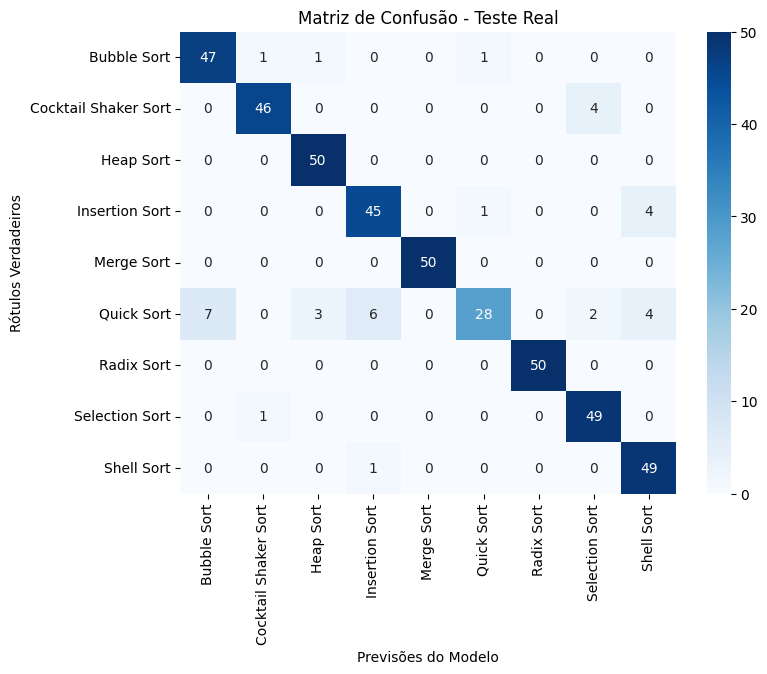

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fazer previsões no novo dataset
y_pred = model.predict(X_new_padded)
y_pred_classes = np.argmax(y_pred, axis=1)  # Converte para rótulos numéricos

# Criar matriz de confusão
conf_matrix = confusion_matrix(y_new, y_pred_classes)

# Converter rótulos de volta para nomes dos algoritmos
algorithms_labels = label_encoder.classes_

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=algorithms_labels, yticklabels=algorithms_labels)
plt.xlabel("Previsões do Modelo")
plt.ylabel("Rótulos Verdadeiros")
plt.title("Matriz de Confusão - Teste Real")
plt.show()
